# Lab1

## Parsing Data

### Import Global Terrorist Attack Database
Manually removed unused columns and shrinked the row count down from 150k -> 5k

https://www.kaggle.com/START-UMD/gtd

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset.csv') # read in the csv file

### Remove Cols

In [2]:
# Remove attributes that aren't useful for us

for col in ['eventid', 'city', 'latitude', 'longitude', 'multiple', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'guncertain1', 'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'weapdetail', 'ishostkid', 'ransom']:
    if col in df:
        del df[col]

### Row Head

In [3]:
df.head()

,iyear,imonth,iday,country,country_txt,region,region_txt,success,suicide,attacktype1,attacktype1_txt,natlty1,natlty1_txt,nkill,nwound
0,1995,8,12,153,Pakistan,6,South Asia,1,0,9,Unknown,153.0,Pakistan,9.0,0.0
1,1995,8,12,160,Philippines,5,Southeast Asia,1,0,7,Facility/Infrastructure Attack,160.0,Philippines,0.0,0.0
2,1995,8,12,160,Philippines,5,Southeast Asia,1,0,3,Bombing/Explosion,160.0,Philippines,0.0,0.0
3,1995,8,12,222,Venezuela,3,South America,1,0,8,Unarmed Assault,222.0,Venezuela,0.0,28.0
4,1995,8,12,6,Algeria,10,Middle East & North Africa,1,0,1,Assassination,6.0,Algeria,1.0,0.0


### Row Count

In [4]:
len(df)

5537

### Describe Rows

In [5]:
df.describe()

,iyear,imonth,iday,country,region,success,suicide,attacktype1,natlty1,nkill,nwound
count,5537.000000,5537.00000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5450.000000,5420.000000,5294.000000
mean,1996.021853,6.44916,15.533141,114.060863,6.491241,0.902474,0.005960,3.455843,113.011193,2.305535,3.466755
std,0.669089,3.57597,8.833010,93.775598,2.855182,0.296699,0.076977,2.387628,79.926465,9.745384,22.369312
min,1995.000000,1.00000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,1996.000000,3.00000,8.000000,45.000000,4.000000,1.000000,0.000000,2.000000,45.000000,0.000000,0.000000
50%,1996.000000,6.00000,16.000000,92.000000,6.000000,1.000000,0.000000,3.000000,93.000000,0.000000,0.000000
75%,1996.000000,10.00000,23.000000,159.000000,9.000000,1.000000,0.000000,3.000000,167.000000,2.000000,1.000000
max,1997.000000,12.00000,31.000000,604.000000,12.000000,1.000000,1.000000,9.000000,999.000000,375.000000,1272.000000


### Columns Used

In [6]:
df.columns

Index(['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region',
       'region_txt', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'natlty1', 'natlty1_txt', 'nkill', 'nwound'],
      dtype='object')

### Column/Row Parsing

#### Attribute Types

In [7]:
continuous_features = ['iyear', 'imonth', 'iday']

nominal_features = ['country','attacktype1','natlty1','nkill','nwound']
binary_features = ['success','suicide']
categorical_features = df.columns.difference(continuous_features).difference(nominal_features).difference(binary_features)

#### Remove NA rows

In [8]:
df.dropna(inplace=True)

#### Attribute Casting

In [9]:
df[continuous_features] = df[continuous_features].astype(np.float64)
df[nominal_features] = df[nominal_features].astype(np.int64)
df[binary_features] = df[binary_features].astype(np.int64)

### Final Check

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5179 entries, 0 to 5536
Data columns (total 15 columns):
iyear              5179 non-null float64
imonth             5179 non-null float64
iday               5179 non-null float64
country            5179 non-null int64
country_txt        5179 non-null object
region             5179 non-null int64
region_txt         5179 non-null object
success            5179 non-null int64
suicide            5179 non-null int64
attacktype1        5179 non-null int64
attacktype1_txt    5179 non-null object
natlty1            5179 non-null int64
natlty1_txt        5179 non-null object
nkill              5179 non-null int64
nwound             5179 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 647.4+ KB


# ---------------------------------------------------------------------------------------------

## Business Understanding

### Overview
Details of terrorism cases worldwide, includes details like country, year, number of deaths, weapon used, etc.

### Purpose

Researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), based to their definition provided, "<i>The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation.</i>", collected unclassifed media articles ranging from 1970-2015 (excluding 1993) and compiled them in their <a href="https://www.start.umd.edu/gtd/">Global Terrorism Database</a> (GTD).

The data is important because it compiles the locations of terrorist events with the details surrounding them, it can tell us the kind of places where terrorism is happening, the amount of deaths from terrorism, and the times when terrorism occurs more frequently. We know we have gathered useful knowledge from the dataset if we can find correlations of when, where, why, or how terrorist attacks occur. By knowing this information it may help us more to effectively fight terrorism in the present and future. False positives, false alarms or false flags could be important based on their context. For example, if the false flag was not a <i>false flag</i> but a secret exercise to test security then such information could be considered useful. Although they may provide theoritical information, such exercises are a better alternative to actual terrorism.  

# ---------------------------------------------------------------------------------------------

## Data Understanding

In [11]:
print(df.dtypes)

iyear              float64
imonth             float64
iday               float64
country              int64
country_txt         object
region               int64
region_txt          object
success              int64
suicide              int64
attacktype1          int64
attacktype1_txt     object
natlty1              int64
natlty1_txt         object
nkill                int64
nwound               int64
dtype: object


iyear and imonth indicate the year and month the terrorist attack took place. Int is fine.

country_txt indicates which country the terrorist attack took place. Obj (String) is fine

region_txt indicates which global region the terrorist attack took place Obj (String) is fine

success indicates whether or not the terrorist attack was successful or not. Should be bool

suicide indicates whether terrorist commited suicide during the attack. Should be bool

attacktype1_txt indicates the type of attack the terrorist used. Obj (String) is fine

natlty1_txt indicates the nationality of the terrorist. Obj (String) is fine

nkill indicates the number of people killed during the terrorist attack. Should be int. Float doesn't make sense because you can't have a fraction of a dead person.

nwound indicates the number of people wounded during the terrorist attack. Should be int. Float doesn't make sense because you can't have a fraction of a wounded person.

### Look for missing data

In [12]:
df.isnull().any()

iyear              False
imonth             False
iday               False
country            False
country_txt        False
region             False
region_txt         False
success            False
suicide            False
attacktype1        False
attacktype1_txt    False
natlty1            False
natlty1_txt        False
nkill              False
nwound             False
dtype: bool

We can see that here is missing data for the nationality of the attacker and the number killed and number wounded.

The nationality of the attacker may be unknown 

The number killed and number wounded may be missing because it may be hard to count the number of people killed/wounded because there were so many, or the information may not be there because the infrastructure reporting the event may be inadequate. 

### Impute missing data

We know when there is an assasination, it usually only involves one person, so where nkill=0 and nwound=Nan, we impute the value of nwound to be 0

We can see that for the most part, the nationality of the terrorist is almost always the same country where they commit the act of terrorism so we impute natlty1=x where country=x

Where nkill=Nan we can see that this is in cases where the attacktype1=Hostage Taking. So we impute nkill=0 where attacktype1=Hostage Taking

### Look for duplicate rows

In [13]:
df[df.duplicated(['iyear','imonth', 'iday', 'country_txt', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'natlty1', 'nkill', 'nwound'])]

,iyear,imonth,iday,country,country_txt,region,region_txt,success,suicide,attacktype1,attacktype1_txt,natlty1,natlty1_txt,nkill,nwound
8,1995.0,8.0,12.0,45,Colombia,3,South America,1,0,2,Armed Assault,45,Colombia,7,0
15,1995.0,8.0,13.0,185,Spain,8,Western Europe,1,0,3,Bombing/Explosion,185,Spain,0,0
16,1995.0,8.0,13.0,185,Spain,8,Western Europe,1,0,3,Bombing/Explosion,185,Spain,0,0
17,1995.0,8.0,13.0,185,Spain,8,Western Europe,1,0,3,Bombing/Explosion,185,Spain,0,0
18,1995.0,8.0,13.0,185,Spain,8,Western Europe,1,0,3,Bombing/Explosion,185,Spain,0,0
19,1995.0,8.0,13.0,185,Spain,8,Western Europe,1,0,3,Bombing/Explosion,185,Spain,0,0
20,1995.0,8.0,13.0,185,Spain,8,Western Europe,1,0,3,Bombing/Explosion,185,Spain,0,0
21,1995.0,8.0,13.0,185,Spain,8,Western Europe,1,0,3,Bombing/Explosion,185,Spain,0,0
22,1995.0,8.0,13.0,185,Spain,8,Western Europe,1,0,3,Bombing/Explosion,185,Spain,0,0
23,1995.0,8.0,13.0,185,Spain,8,Western Europe,1,0,3,Bombing/Explosion,185,Spain,0,0


We can see that there is actually quite a lot of duplicated data. look at rows 15,16,17 for example. It is quite unlikely that 3 of the events with the same exact information (date, country, numkilled/wounded). So the next step is to take out the duplicate data.

   ### Remove duplicate data

In [14]:
df.drop_duplicates(inplace=True)

# ---------------------------------------------------------------------------------------------

# Data Visualization

## Imports

In [15]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import scipy.stats.mstats as mstats
warnings.simplefilter('ignore', DeprecationWarning)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

def mode(x):
    return mstats.mode(x, axis=None)[0]

%matplotlib inline

## Percentage of attacks that are successful

In [16]:
float(len(df[df.success==1]))/len(df)*100.0

88.96231032794908

## Percentage of attacks that end in a suicide

In [17]:
float(len(df[df.suicide==1]))/len(df)*100.0

0.7831620166421929

Less than 1% of attacks end in a suicide.

## Top regions with attacks

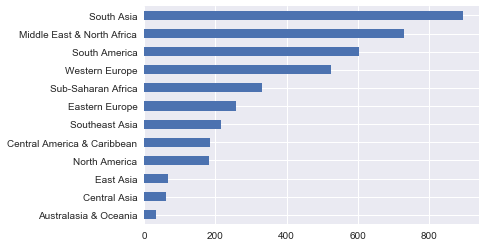

In [18]:
df.region_txt.value_counts().sort_values().plot(kind='barh')

Sri Lanka and India have a lot of attacks that is why South Asia has a large number of attacks. The populations in these countries are quite high so proportionally they will probably have more attacks recorded.

## Top countries with attacks

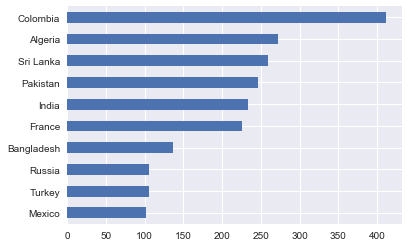

In [19]:
df.country_txt.value_counts().head(10).sort_values().plot(kind='barh')

I'm assuming Columbia has the most attacks due to rival cartels competing for drug crops/land.

## Which attacks are most successful?

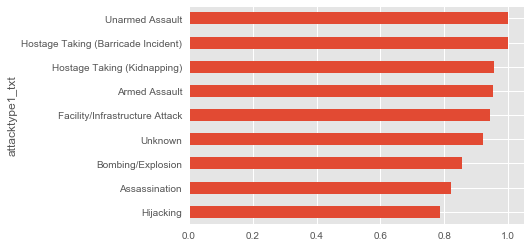

In [20]:
# Start by just plotting what we previsously grouped!
plt.style.use('ggplot')

df_successful = df.groupby(by=['attacktype1_txt'])
success_rate = df_successful.success.sum() / df_successful.success.count()
success_rate.sort_values().plot(kind='barh')

Hijackings seems to have the lowest success rate because you are trying to take a hold of something you don't know how hard it will be to take.

## Scatter Matrix

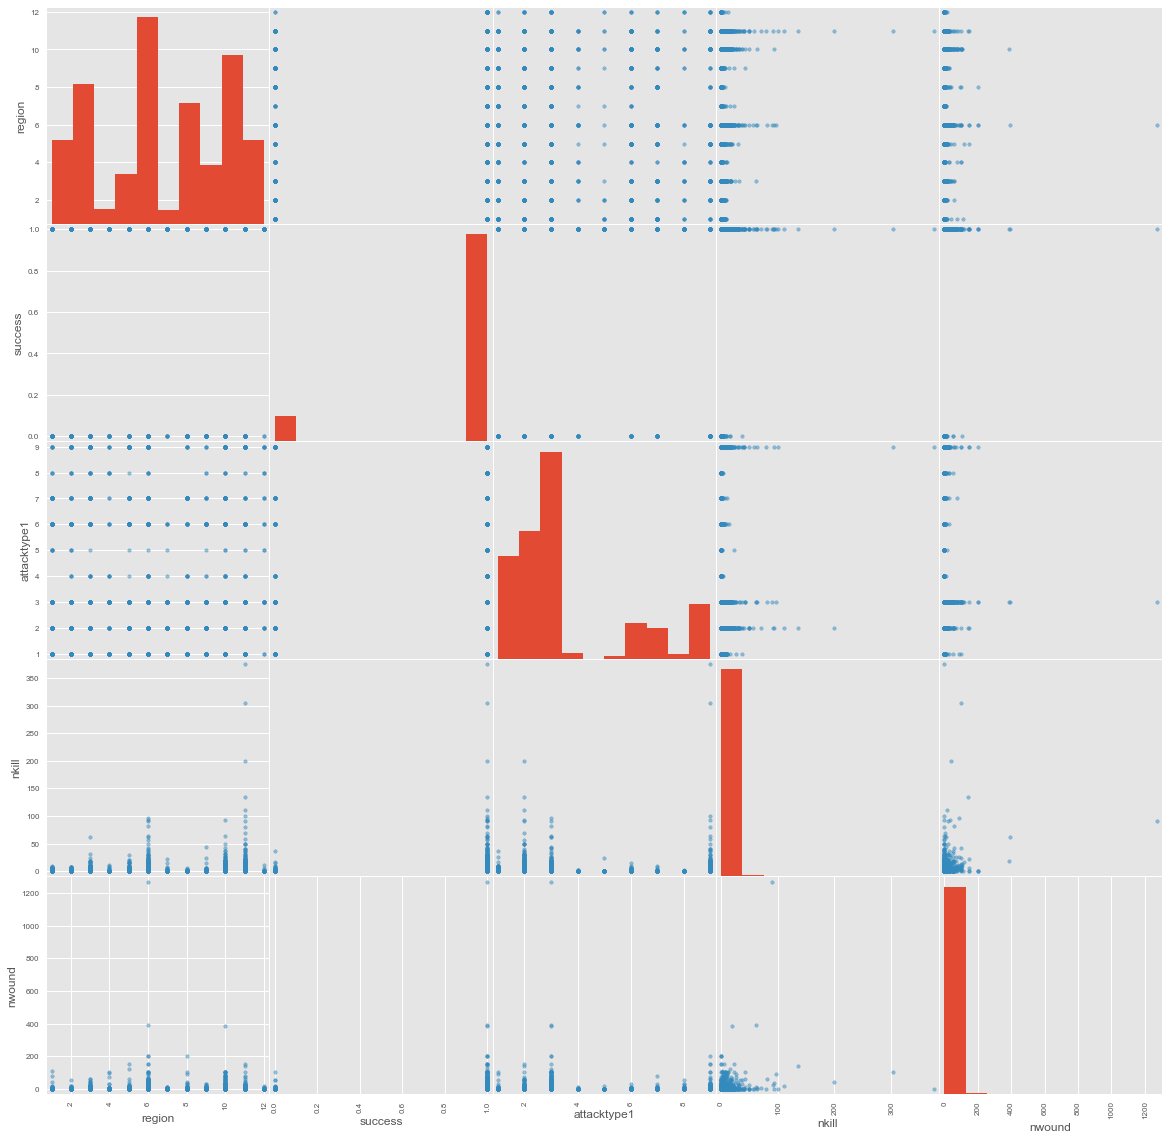

In [21]:
from pandas.tools.plotting import scatter_matrix

df_scatter_matrix = df.copy(True)
# 1. Remove attributes that just arent useful for us
for col in df_scatter_matrix:
    if col not in ['region', 'success', 'attacktype1', 'nkill', 'nwound']:
        del df_scatter_matrix[col]
        
# print(df_condensed)
# not a good plot, it needs jitter to make the categorical attributes better visualized
ax = scatter_matrix(df_scatter_matrix,figsize=(20, 20))
# print(df_condensed)

# also we need some type of subset selection, this is just too much data

### With jitter

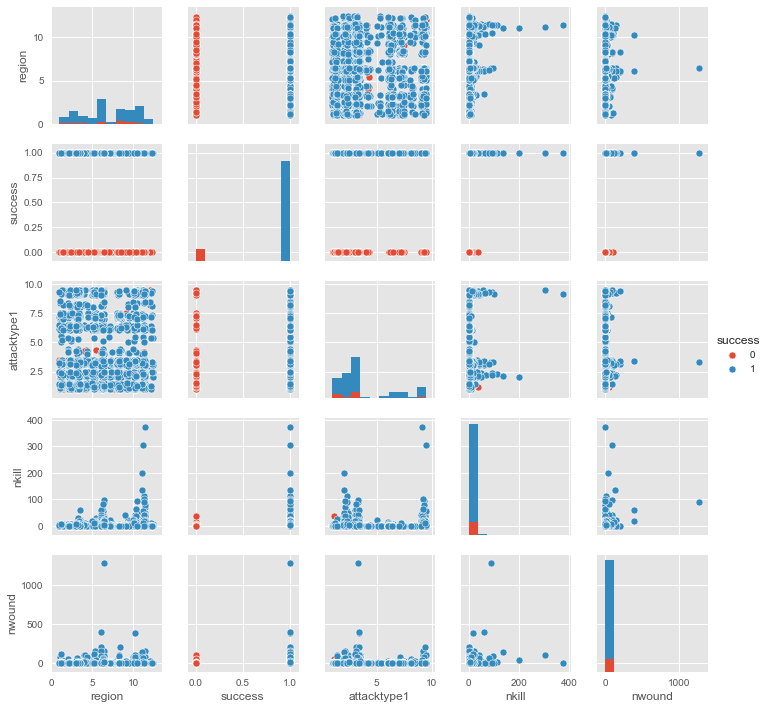

In [22]:
# df_scatter_matrix.info()
df_scatter_matrix_jitter = df_scatter_matrix.copy()
df_scatter_matrix_jitter[['region','nkill','nwound','attacktype1']] = df_scatter_matrix_jitter[['region','nkill','nwound','attacktype1']].values + np.random.rand(len(df_scatter_matrix_jitter),4)/2 

sns.pairplot(df_scatter_matrix_jitter, hue="success", size=2)

From this we can derive a couple of relationships. Attack type 3 (bombings) wounds the most people. Attack type 2 (armed assault) kills the most people. Bombing blasts can wound a lot of people but armed attacks are more focused on each individual they are killing.

Region 12 and then region 6 has higher amounts of kills in each attacks.

Attack type 4-6 is not done as much.

Attack type 3,4,9,2 kills the most people from most to least.

## Amount of people killed in each individual attack

(-1, 18)

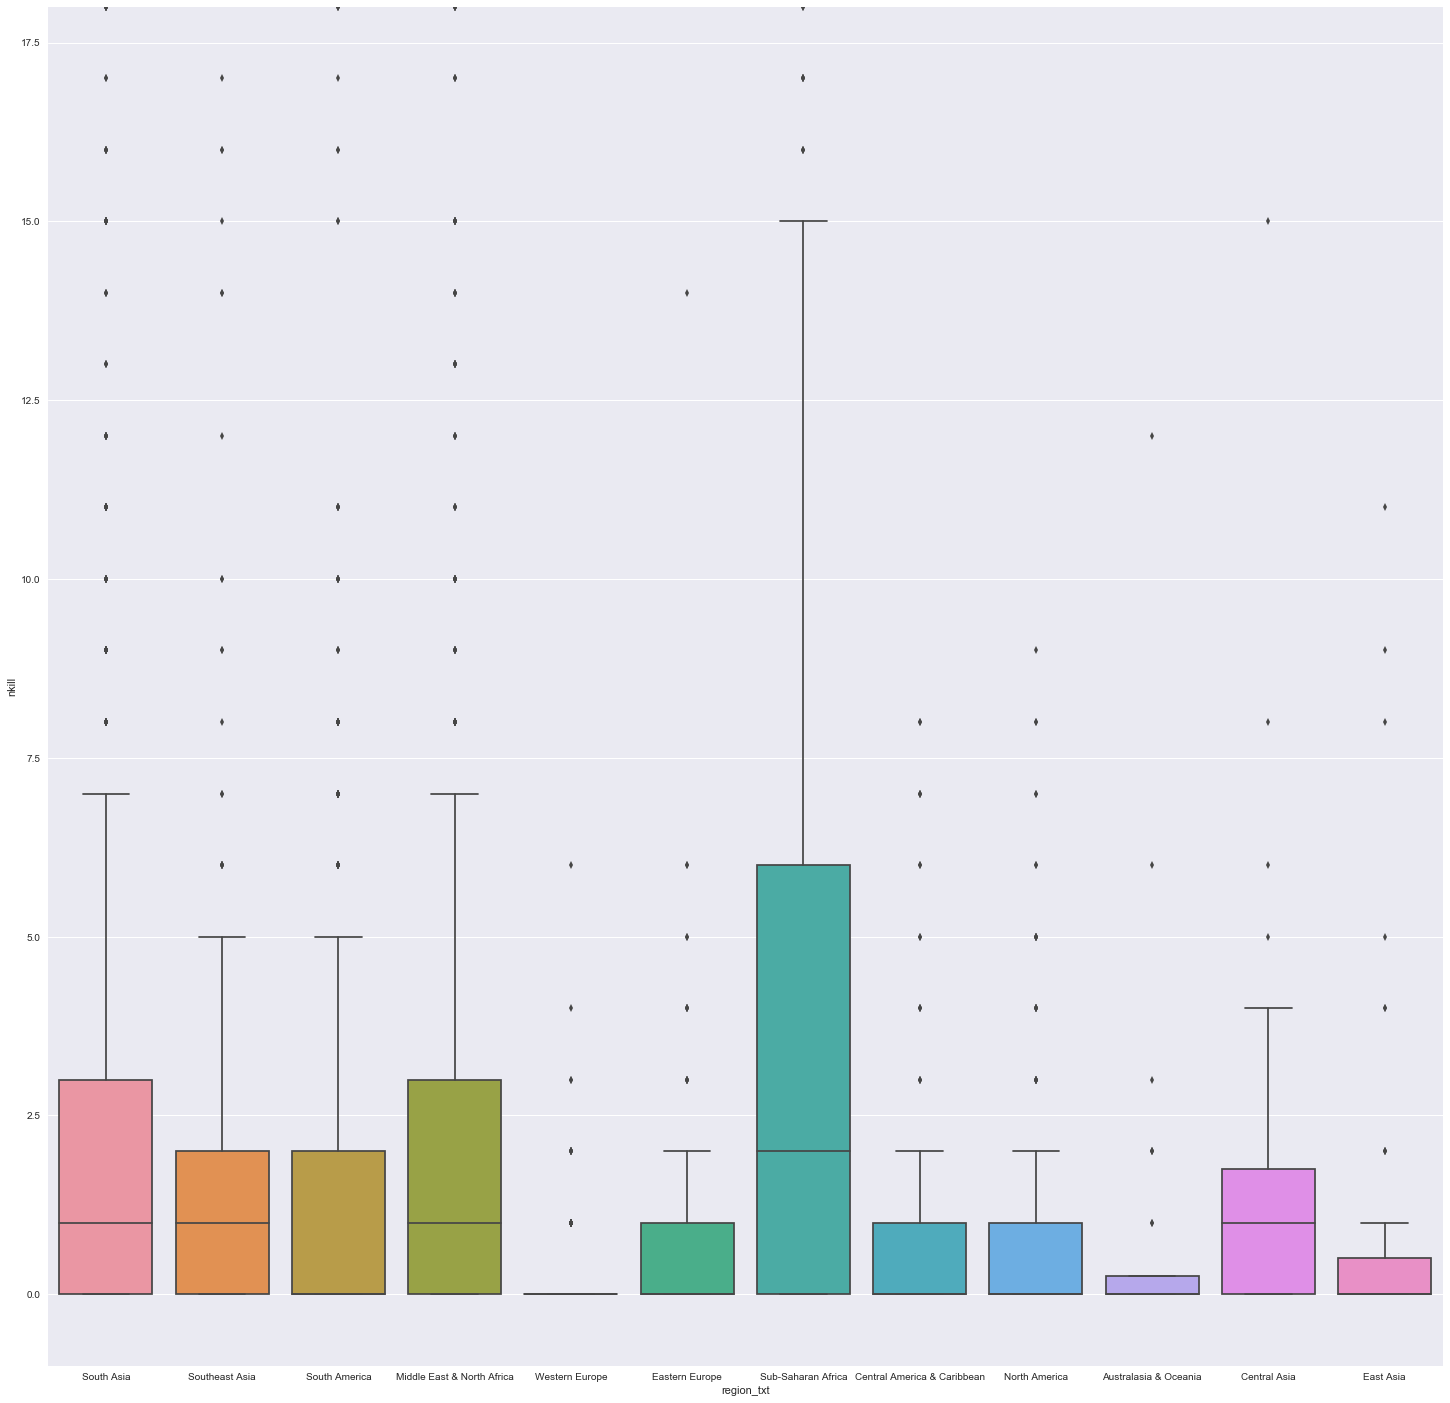

In [23]:
# ax = df.boxplot(column='nkill', by = 'region_txt', figsize=(25, 25)) # group by class
# ax.set_ylim(-1,18)
sns.set(rc={"figure.figsize": (25, 25)})
ax = sns.boxplot(x="region_txt", y="nkill", data=df)
ax.set_ylim(-1,18)

Sub-Saharan Africa kills on average the most people in each attack. Most of the citizens are defenseless thus causing more casualties.

## Percentage of People Killed

[(0, 50)]

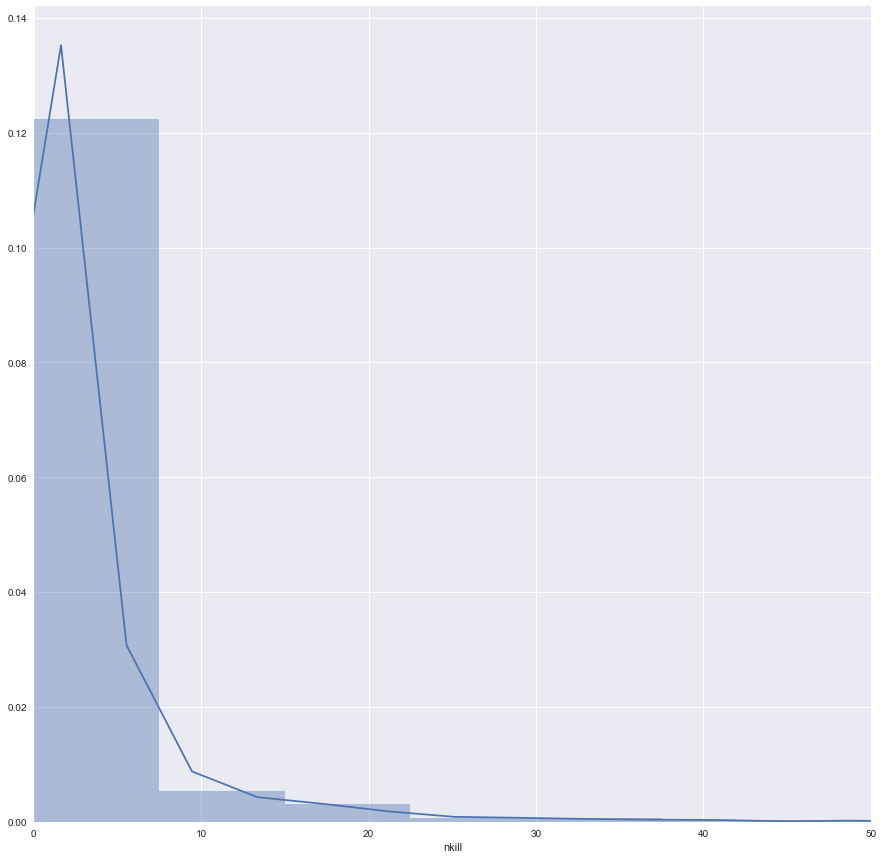

In [24]:
sns.set(rc={"figure.figsize": (15, 15)})
g = sns.distplot(df.nkill)
g.set(xlim=(0, 50))

Most attacks end in 0-7 people getting killed.

## Heatmap Correlation

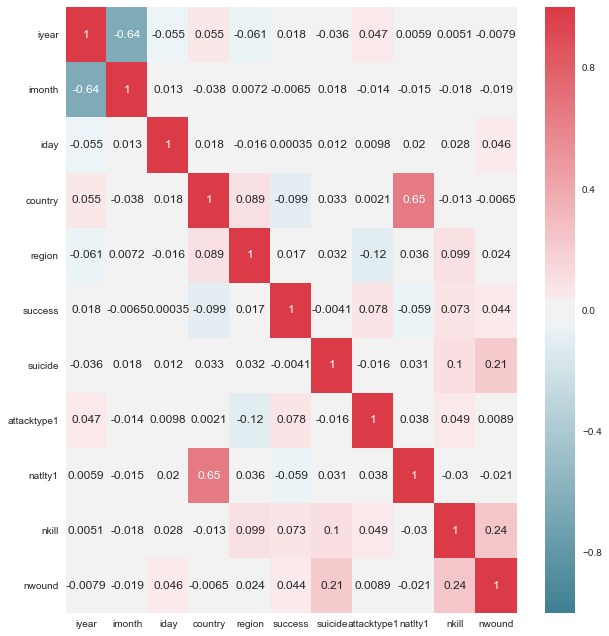

In [25]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()

The country/nationality, number killed/number wounded, and number wounded/did suicide have the highest correlations.

## What type of attack happen in certain regions?

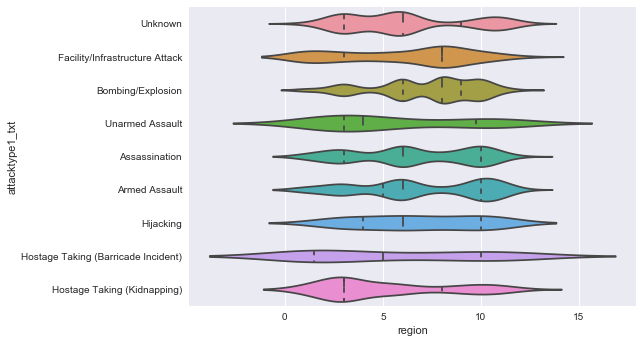

In [26]:
from  matplotlib.ticker import FuncFormatter
sns.violinplot(x="region", y="attacktype1_txt", data=df, inner="quart")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

Region 8 (Western Europe) has a lot of bombings. Region 6 (South Asia) has a lot of armed assaults. Hostages are taken quite often in South America.